In [97]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import numpy as np

%matplotlib inline
# Adjust the configuration of the plots we will create
matplotlib.rcParams['figure.figsize'] = (12,8) 


In [5]:
# Read in the data

df = pd.read_csv('/Users/jiangyonglin/Desktop/DS:DA project/Correlation in Python /movies.csv')
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [15]:
# Look for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [17]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [23]:
# Specifiy what columns are looking, change data type of columns
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')


In [25]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [55]:
df['released'].head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [ ]:
# Create correct Year column
df['yearcorrect'] = df['released'].str.extract(r'(\d{4})')

In [167]:
df.dtypes

name             int16
rating            int8
genre             int8
year             int64
released         int16
score          float64
votes          float64
director         int16
writer           int16
star             int16
country           int8
budget           int64
gross            int64
company          int16
runtime        float64
yearcorrect       int8
dtype: object

In [169]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       55  237000000  2847246203     2253    162.0           29  
7445  2241       55  356000000  2797501328     1606    181.0           39  
3045  1595       55  200000000  2201647264     2253    194.0           17  
6663   524       55  245000000  2069521700     1540    138.0           35  
7244  2241       55  321000000  2048359754     1606    149.0           38

In [65]:
df.sort_values(by = ['gross'], inplace = False, ascending=False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

                               released  score      votes        director  \
5445  December 18, 2009 (United States)    7.8  1100000.0   James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0   Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0   James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0     J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0   Anthony Russo   
...                                 ...    ...        ...             ...   
1617   January 26, 1990 (United States)    4.5      274.0     Andrew Lane   
1614     April 14, 1989 (United States)    5.2     1300.0  Gérard Kikoïne   
1606      April 7, 1989 (United States)    6.0     2900.0    Tibor Takács   
1601           January 13, 1990 (Japan)    7.1     1500.0   Ildikó Enyedi   
7667    August 19, 2020 (United States)    5.7        7.0    Pereko Mosia   

                  writer               star         country     budget  \
5445       James Cameron    Sam Worthington   United States  237000000   
7445  Christopher Markus  Robert Downey Jr.   United States  356000000   
3045       James Cameron  Leonardo DiCaprio   United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley   United States  245000000   
7244  Christopher Markus  Robert Downey Jr.   United States  321000000   
...                  ...                ...             ...        ...   
1617      Alan Moskowitz      Zach Galligan   United States          0   
1614          J.P. Félix    Anthony Perkins  United Kingdom          0   
1606       David Chaskin       Jenny Wright          Canada          0   
1601       Ildikó Enyedi       Dorota Segda         Hungary          0   
7667        Pereko Mosia   Siyabonga Mabaso    South Africa          0   

           gross                          company  runtime yearcorrect  
5445  2847246203            Twentieth Century Fox    162.0        2009  
7445  2797501328                   Marvel Studios    181.0        2019  
3045  2201647264            Twentieth Century Fox    194.0        1997  
6663  2069521700                        Lucasfilm    138.0        2015  
7244  2048359754                   Marvel Studios    149.0        2018  
...          ...                              ...      ...         ...  
1617           0          Gibraltar Entertainment     92.0        1990  
1614           0                    Allied Vision     85.0        1989  
1606           0  Trans World Entertainment (TWE)     89.0        1989  
1601           0         Budapest Stúdió Vállalat    104.0        1990  
7667           0                      PK 65 Films    102.0        2020  

[7668 rows x 16 columns]

In [71]:
# review full data
pd.set_option('display.max_rows', None)

In [161]:
df = df.sort_values(by = ['gross'], inplace = False, ascending=False)

In [ ]:
#  drop any duplicates
df['company'].drop_duplicates().sort_values(ascending = False)

In [185]:
df.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  yearcorrect  
5445  2334       55  237000000  2847246203     2253    162.0           29  
7445  2241       55  356000000  2797501328     1606    181.0           39  
3045  1595       55  200000000  2201647264     2253    194.0           17  
6663   524       55  245000000  2069521700     1540    138.0           35  
7244  2241       55  321000000  2048359754     1606    149.0           38

Text(0, 0.5, 'Gross Earnings')

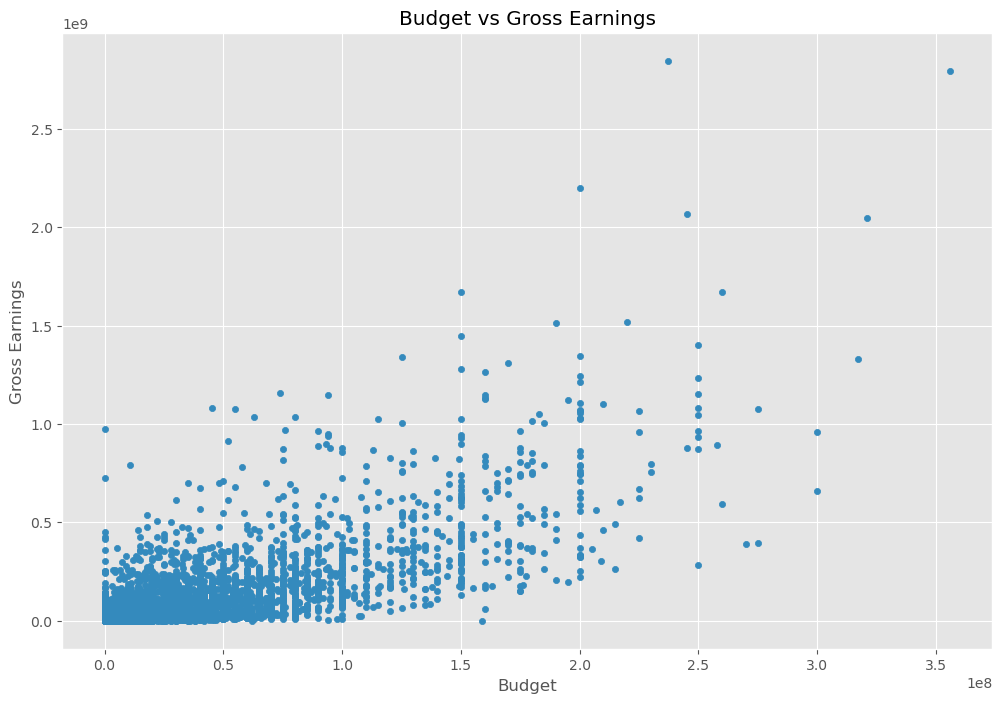

In [107]:
# budget may have high correlation
# company may will have high correlation

# Build a scatter plot with budget vs gross

ax = df.plot(kind='scatter', x="budget", y="gross", title = "Budget vs Gross Earnings")

ax.set_xlabel('Budget')
ax.set_ylabel('Gross Earnings')



<Axes: xlabel='budget', ylabel='gross'>

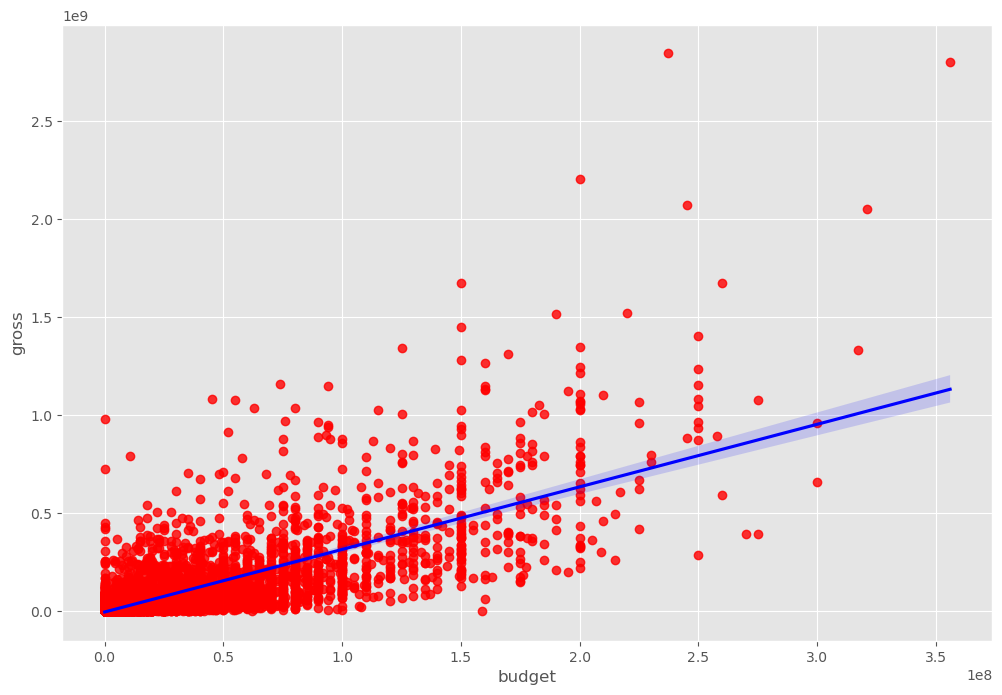

In [111]:
#  use seaborn to plot budget vs gross
sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {'color': 'red'}, line_kws = {'color':'blue'})

In [125]:
# Correlation
# pearson, kendall, spearman
df.select_dtypes(include=[float, int]).corr()

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [127]:
df.select_dtypes(include=[float, int]).corr(method = 'pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [129]:
df.select_dtypes(include=[float, int]).corr(method = 'kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016
gross    0.216595  0.090626  0.560118  0.541956  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000

In [131]:
df.select_dtypes(include=[float, int]).corr(method = 'spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.291152  0.314681  0.142977
score    0.099045  1.000000  0.428138 -0.007500  0.132569  0.399857
votes    0.469829  0.428138  1.000000  0.604627  0.752265  0.290159
budget   0.291152 -0.007500  0.604627  1.000000  0.716816  0.246748
gross    0.314681  0.132569  0.752265  0.716816  1.000000  0.256783
runtime  0.142977  0.399857  0.290159  0.246748  0.256783  1.000000

In [133]:
# high correlation between budget and gross

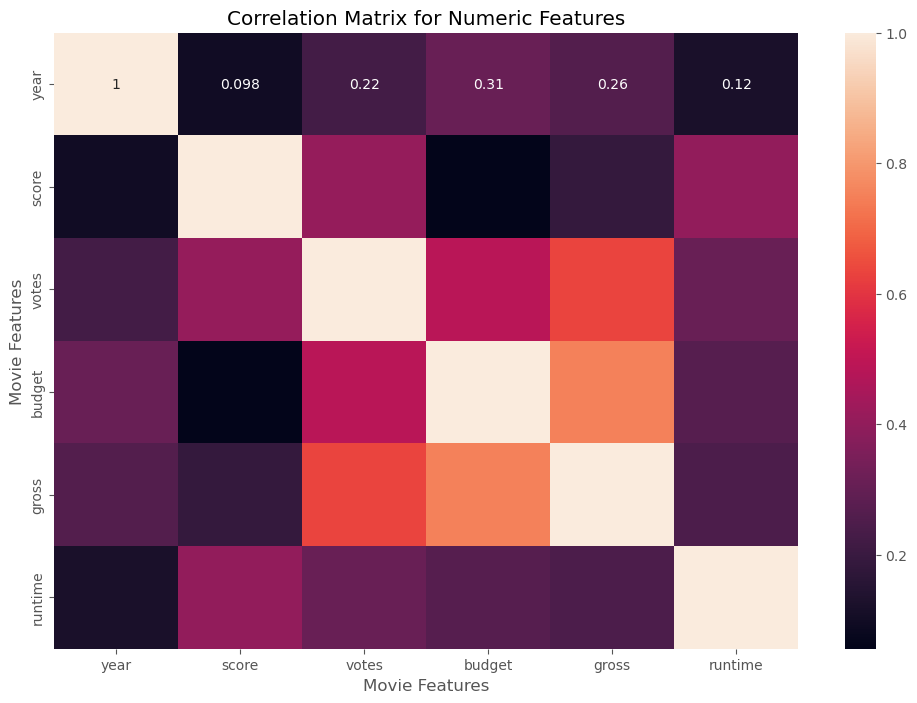

In [151]:
correlation_matrix = df.select_dtypes(include=[float, int]).corr(method = 'pearson')
ax2 = sns.heatmap(correlation_matrix, annot = True)
plt.title ('Correlation Matrix for Numeric Features')

ax2.set_xlabel('Movie Features')
ax2.set_ylabel('Movie Features')

plt.show()

In [153]:
#  Company

df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime yearcorrect  
5445  2847246203  Twentieth Century Fox    162.0        2009  
7445  2797501328         Marvel Studios    181.0        2019  
3045  2201647264  Twentieth Century Fox    194.0        1997  
6663  2069521700              Lucasfilm    138.0        2015  
7244  2048359754         Marvel Studios    149.0        2018

In [171]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       696    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       183    8.4   903000.0       162     743   
3045  6896       5      6  1997       704    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2018      1799    6.2   277000.0      1121    1093   
6262  2130       4      2  2013      2715    7.4   585000.0       432    1950   
7072   657       4      7  2017      2022    7.1   283000.0       250    4000   
7281  2760       4      2  2018      1729    7.6   263000.0       303     491   
7055  5833       5      0  2017        61    6.6   214000.0       835    1431   
6244  2823       5      0  2013      2449    7.1   779000.0      2543    1174   
6688  3622       4      2  2015      1395    6.4   218000.0      1639     534   
6846  1056       5      0  2016      2488    7.8   694000.0       162     743   
7250   474       5      0  2018       748    6.9   404000.0      1189     990   
4245  6221       5      0  2003       680    8.9  1700000.0      2193    1745   
7458  5084       5      0  2019      1501    7.5   359000.0      1463     704   
7456  1061       5      0  2019      2213    6.8   478000.0       147     255   
5878  6968       5      0  2011      1870    6.2   390000.0      1886    1237   
6059  4951       5      0  2012      2804    7.7   642000.0      2476    3125   
6494  6967       5      0  2014      1849    5.6   302000.0      1886    1237   
2448  6194       1      2  1994      1811    8.5   970000.0      2415    1702   
6047  5726       5      0  2012      1510    8.4  1600000.0       483    2265   
7463  5141       5      0  2019       731    6.5   394000.0      1125     714   
7450  2930       6      5  2019      3062    8.4  1000000.0      2767    4248   
7488  6949       1      2  2019      1787    7.7   217000.0      1509    2158   
5685  6948       1      2  2010      1752    8.2   776000.0      1678    2158   
4852  4258       5      0  2006      1645    7.3   668000.0       996    4147   
6869  4616       5      0  2016       673    7.8   572000.0       912     717   
7481   290       4      1  2019      2394    6.9   239000.0      1031    2078   
5860  4261       5      0  2011      2350    6.6   492000.0      2341    4147   
7140  1552       4      2  2017      1896    6.3   119000.0      1639     758   
2245  2967       5      0  1993      1689    8.1   894000.0      2660    2931   
6908  1978       4      2  2016      1744    7.3   250000.0       124     215   
3451  5138       4      0  1999      2318    6.5   748000.0       963    1472   
5667   300       4      1  2010      2182    6.4   392000.0      2745    2607   
6863  7504       4      2  2016      2175    8.0   450000.0       362     576   
6045  6001       5      1  2012       651    7.8   773000.0      2193    1359   
3843  2412       4      1  2001      2593    7.6   685000.0       435    1741   
5243  5725       5      0  2008      1476    9.0  2400000.0       483    2265   
5652  2406       5      1  2010      

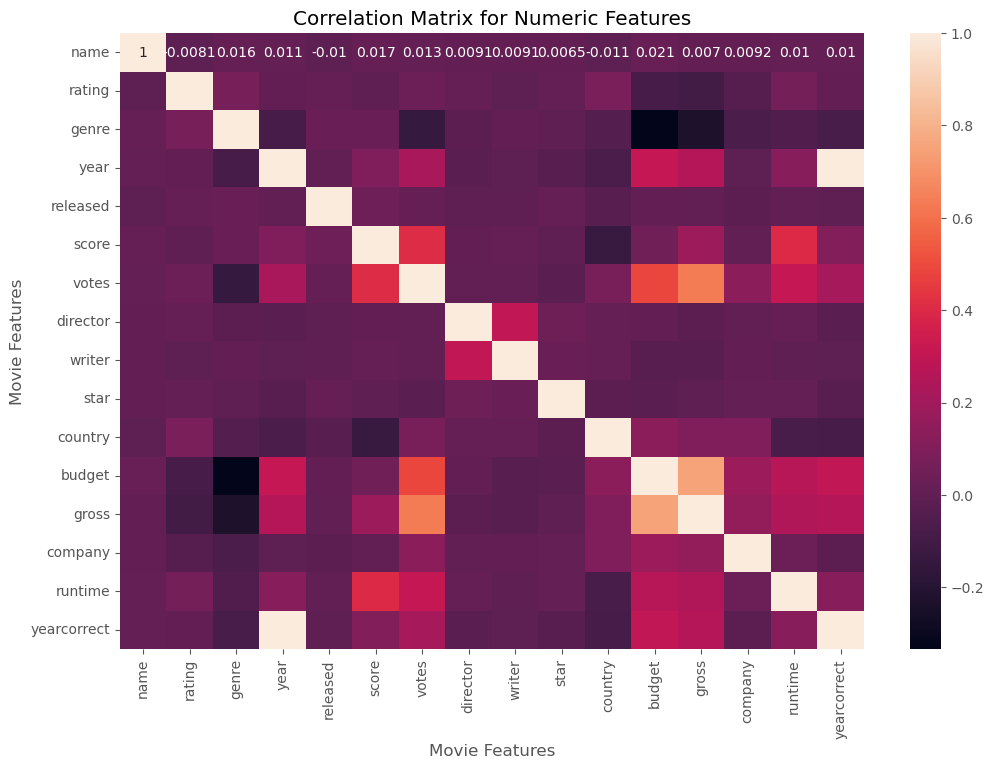

In [175]:
correlation_matrix = df.corr(method = 'pearson')
ax2 = sns.heatmap(correlation_matrix, annot = True)
plt.title ('Correlation Matrix for Numeric Features')

ax2.set_xlabel('Movie Features')
ax2.set_ylabel('Movie Features')

plt.show()

In [177]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.010480  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.017208 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.030429  0.027965   
year         0.011453  0.008779 -0.081261  1.000000  0.000077  0.097995   
released    -0.010480  0.017208  0.030429  0.000077  1.000000  0.042148   
score        0.017097 -0.001314  0.027965  0.097995  0.042148  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016154  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001526  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002784  0.019416   
star         0.006472  0.013405 -0.005477 -0.027242  0.015805 -0.001609   
country     -0.010737  0.081244 -0.037615 -0.070938 -0.023408 -0.133348   
budget       0.020548 -0.081939 -0.334021  0.309212  0.008552  0.055665   
gross        0.006989 -0.095450 -0.234297  0.261900  0.000100  0.186392   
company      0.009211 -0.032943 -0.071067 -0.010431 -0.012269  0.001030   
runtime      0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
yearcorrect  0.010225  0.006403 -0.078210  0.996397 -0.005512  0.106295   

                votes  director    writer      star   country    budget  \
name         0.013088  0.009079  0.009081  0.006472 -0.010737  0.020548   
rating       0.033225  0.019483 -0.005921  0.013405  0.081244 -0.081939   
genre       -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.334021   
year         0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.309212   
released     0.016154 -0.001526 -0.002784  0.015805 -0.023408  0.008552   
score        0.409182  0.009559  0.019416 -0.001609 -0.133348  0.055665   
votes        1.000000  0.000260  0.000892 -0.019282  0.073625  0.486862   
director     0.000260  1.000000  0.299067  0.039234  0.017490  0.004976   
writer       0.000892  0.299067  1.000000  0.027245  0.015343 -0.025911   
star        -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.019952   
country      0.073625  0.017490  0.015343 -0.012998  1.000000  0.131720   
budget       0.486862  0.004976 -0.025911 -0.019952  0.131720  1.000000   
gross        0.632834 -0.014916 -0.022997 -0.001129  0.095325  0.750157   
company      0.133204  0.004404  0.005646  0.012442  0.095548  0.186474   
runtime      0.309212  0.017624 -0.003511  0.010174 -0.078412  0.269510   
yearcorrect  0.218289 -0.020385 -0.008391 -0.027606 -0.079009  0.300236   

                gross   company   runtime  yearcorrect  
name         0.006989  0.009211  0.010392     0.010225  
rating      -0.095450 -0.032943  0.062145     0.006403  
genre       -0.234297 -0.071067 -0.052711    -0.078210  
year         0.261900 -0.010431  0.120811     0.996397  
released     0.000100 -0.012269  0.000868    -0.005512  
score        0.186392  0.001030  0.399451     0.106295  
votes        0.632834  0.133204  0.309212     0.218289  
director    -0.014916  0.004404  0.017624    -0.020385  
writer      -0.022997  0.005646 -0.003511    -0.008391  
star        -0.001129  0.012442  0.010174    -0.027606  
country      0.095325  0.095548 -0.078412    -0.079009  
budget       0.750157  0.186474  0.269510     0.300236  
gross        1.000000  0.156745  0.245235     0.255130  
company      0.156745  1.000000  0.034402    -0.014144  
runtime      0.245235  0.034402  1.000000     0.120636  
yearcorrect  0.255130 -0.014144  0.120636     1.000000

In [179]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.010480
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect    0.010225
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.017208
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [181]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.234297
gross        genre         -0.234297
votes        genre         -0.145307
genre        votes         -0.145307
score        country       -0.133348
country      score         -0.133348
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      yearcorrect   -0.079009
yearcorrect  country       -0.079009
runtime      country       -0.078412
country      runtime       -0.078412
yearcorrect  genre         -0.078210
genre        yearcorrect   -0.078210
             company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
runtime      genre         -0.052711
genre        runtime       -0.052711
country      genre         -0.037615
g

In [183]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632834
votes        gross          0.632834
budget       gross          0.750157
gross        budget         0.750157
year         yearcorrect    0.996397
yearcorrect  year           0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# votes and gross , budget and gross have the highest correlation 